# 1、preprocessing
对图片和数据进行预处理，包括将标签存成0-1矩阵，读取图片，转换为灰度图，并将结果存成npz文件<br /> 
<font color="#dd0000">测试集共有800张图片，每个图片有4个字符，可能出现的字符有46个</font><br /> 
<font color="#dd0000">图片像素为60宽*160长 原图有1个通道灰度图片</font><br /> 
<font color="#dd0000">最后输出包含x,y,y_lable,text图片标题，alfa 46个字符集的一个npz文件preprocessed-data-test.npz 作为后续使用</font><br /> 

## Import statements

## Preprocessing captcha texts

In [1]:
from os import listdir
from re import match
from itertools import product, count
from skimage import io

import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2 as cv
from keras.utils import to_categorical

%matplotlib inline

In [2]:
#读取文件名列表
images = listdir('./test') 

#过滤文件名列表
images = list(filter(lambda image: match('^[A-Za-z0-9]+\..+$', image), images))

In [3]:
len(images) 

800

In [4]:
#提取出标签
texts = [match('^([A-Za-z0-9]+)\..+$', image).group(1) for image in images]

#确保所有标签只有4位
all([len(text) == 4 for text in texts])

True

In [6]:
#给62个字符进行编号
alphabet = [chr(letter) for letter in range(ord('A'), ord('Z')+1)]+ [chr(letter) for letter in range(ord('a'), ord('z')+1)] + [chr(ord('0')+digit) for digit in range(0, 10)]

In [8]:
temp=list('cgiIjlOopqsuvwxz')

In [20]:
for i in temp:
    for j in range(len(alphabet)):
        if i ==alphabet[j]:
            alphabet.pop(j)
            break

In [23]:
ids = dict(zip(alphabet, count(0)))

In [25]:
y_labels = np.zeros([len(texts),4], dtype=np.uint8)
for i, j in product(range(0, len(texts)), range(0, 4)):
    text = texts[i]
    y_labels[i, j] = ids[text[j]]

In [26]:
y_labels.shape

(800, 4)

In [27]:
y_labels

array([[ 1, 19, 40, 30],
       [30, 14, 27, 25],
       [14,  6, 35,  4],
       ...,
       [26, 30, 14, 37],
       [31, 18, 10, 15],
       [35, 37, 10, 26]], dtype=uint8)

将文件名变成800 \* 4 \* 46的0-1变量矩阵

In [28]:
y = np.zeros([len(texts), 4, len(alphabet)], dtype=np.uint8)
for i, j in product(range(0, len(texts)), range(0, 4)):
    y[i, j, :] = to_categorical(y_labels[i, j], len(alphabet))

In [29]:
y.shape

(800, 4, 46)

In [30]:
y[0, 0, :], texts[0][0], ids['6']

(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=uint8),
 'B',
 42)

## Captcha images preprocessing

In [31]:
X = np.zeros([len(texts), 60, 160, 1], dtype=np.uint8)

In [32]:
for i, image in zip(range(0, len(images)), images):
    x = cv.imread('./test/' + image,0)   #一个x是62*162的数组 
    assert x.shape == (60, 160)
    X[i, :, :, :] = x.reshape([60, 160, 1])

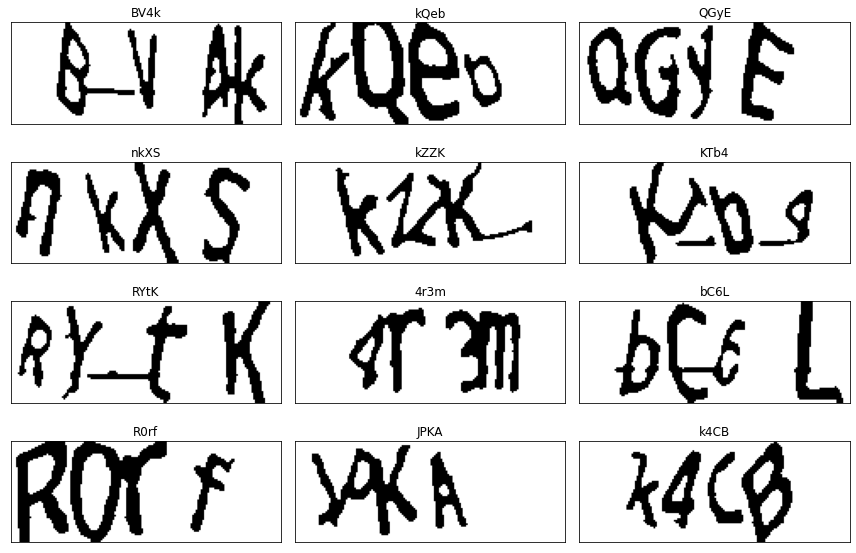

In [33]:
fig, ax = plt.subplots(4, 3, figsize=(12, 8))

for i, j in product(range(0, 4), range(0, 3)):
    plt.sca(ax[i, j])
    k = i * 3 + j
    plt.imshow(X[k, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(texts[k])
plt.tight_layout()

Save the results in a npy file. Use np.load(...) to restore the variables

In [34]:
np.savez_compressed('./preprocessed-data-test.npz',
                    X=X, y=y, y_labels=y_labels, texts=texts, alphabet=alphabet, ids=ids)

读取文件进行测试

In [35]:
datas = np.load('./preprocessed-data-test.npz',allow_pickle=True)

['X', 'a', 'V', 'S']


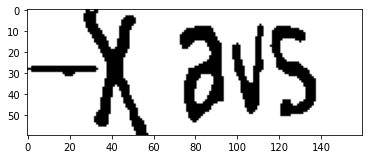

In [38]:
plt.imshow(datas['X'][200, :, :, 0], cmap='gray')
print([alphabet[i] for i in datas['y_labels'][200]])